In [1]:
import pandas as pd
# Import scaffoldgraph
import scaffoldgraph as sg

# Import networkx
import networkx as nx

# Import plotting tools
import matplotlib.pyplot as plt

# Import rdkit
from rdkit.Chem import Draw
from rdkit import Chem

In [2]:
# function to get hierarchy 
def rearrange(data_dict, smiles):
    new_dict = {'smiles': smiles}
    new_dict.update(data_dict)
    return new_dict


In [3]:
df = pd.read_csv('deepchem-bace.csv')

In [4]:
df

,mol,CID,pIC50
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,9.154901
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,8.853872
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,8.698970
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,8.698970
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,8.698970
...,...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,BACE_1543,3.000000
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,BACE_1544,3.000000
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,BACE_1545,2.953115
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,BACE_1546,2.733298


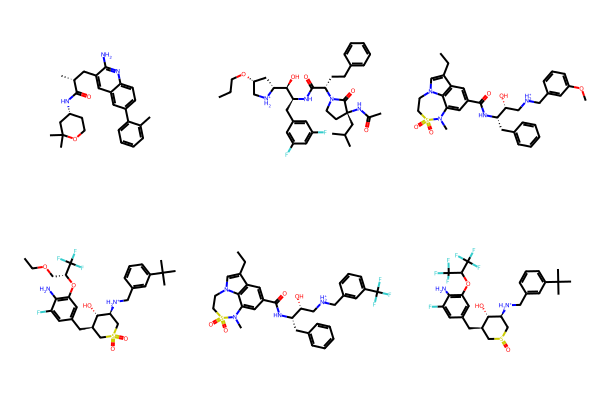

In [5]:
supplier = [Chem.MolFromSmiles(smi) for smi in df.mol]

peek = 6
Draw.MolsToGridImage([supplier[x] for x in range(peek)])

In [6]:
network = sg.HierS.from_dataframe(
    df, smiles_column='mol', name_column='CID',
    data_columns=['pIC50'], progress=True,
)

HierS:   0%|                                                                                              | 0/…

In [7]:
# We can access the number of molecule nodes and scaffold nodes in the graph
n_scaffolds = network.num_scaffold_nodes
n_molecules = network.num_molecule_nodes

print('\nGenerated scaffold network from {} molecules with {} scaffolds\n'.format(n_molecules, n_scaffolds))


Generated scaffold network from 1508 molecules with 1959 scaffolds



In [8]:
#network.__dir__()

[(1, 99), (2, 457), (3, 680), (4, 531), (5, 172), (6, 17), (7, 3)]


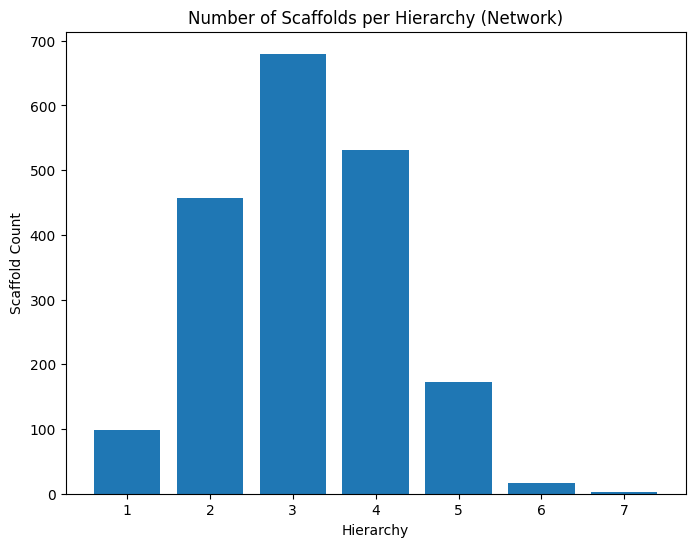

In [9]:
# We can get the number of scaffolds in each hierarchy easily

counts = network.get_hierarchy_sizes()  # returns a collections Counter object
lists = sorted(counts.items())
print(lists)
x, y = zip(*lists)

# Plot sizes as bar chart

plt.figure(figsize=(8, 6))
plt.bar(x, y)
plt.xlabel('Hierarchy')
plt.ylabel('Scaffold Count')
plt.title('Number of Scaffolds per Hierarchy (Network)')
plt.show()

In [10]:
tesdt =list(network.get_scaffold_nodes(data=True))

In [11]:
df = pd.DataFrame(list(network.get_scaffold_nodes(data=True)),columns=[['Smiles','data']])


In [12]:
list(network.get_molecule_nodes(data=True))


[('BACE_1',
  {'type': 'molecule',
   'smiles': 'Cc1ccccc1-c1ccc2nc(N)c(C[C@@H](C)C(=O)N[C@@H]3CCOC(C)(C)C3)cc2c1',
   'pIC50': 9.1549015}),
 ('BACE_2',
  {'type': 'molecule',
   'smiles': 'CCCO[C@H]1C[NH2+][C@@H]([C@@H](O)[C@H](Cc2cc(F)cc(F)c2)NC(=O)[C@H](CCc2ccccc2)N2CC[C@@](CC(C)C)(NC(C)=O)C2=O)C1',
   'pIC50': 8.8538723}),
 ('BACE_3',
  {'type': 'molecule',
   'smiles': 'CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C[NH2+]Cc4cccc(OC)c4)cc13)N(C)S(=O)(=O)CC2',
   'pIC50': 8.6989698}),
 ('BACE_4',
  {'type': 'molecule',
   'smiles': 'CCOC[C@@H](Oc1cc(C[C@@H]2CS(=O)(=O)C[C@H]([NH2+]Cc3cccc(C(C)(C)C)c3)[C@H]2O)cc(F)c1N)C(F)(F)F',
   'pIC50': 8.6989698}),
 ('BACE_5',
  {'type': 'molecule',
   'smiles': 'CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C[NH2+]Cc4cccc(C(F)(F)F)c4)cc13)N(C)S(=O)(=O)CC2',
   'pIC50': 8.6989698}),
 ('BACE_6',
  {'type': 'molecule',
   'smiles': 'CC(C)(C)c1cccc(C[NH2+][C@H]2CS(=O)C[C@@H](Cc3cc(F)c(N)c(OC(C(F)(F)F)C(F)(F)F)c3)[C@@H]2O)c1',
   'pIC50': 8.6989698}),

In [13]:
smilist = ['O=C(CCc1cnc2ccc(-c3ccccc3)cc2c1)NC1CCOCC1','c1ccc(-c2ccc3ncccc3c2)cc1','c1ccc2ncccc2c1','c1ccncc1']
mols = [Chem.MolFromSmiles(smi) for smi in smilist]

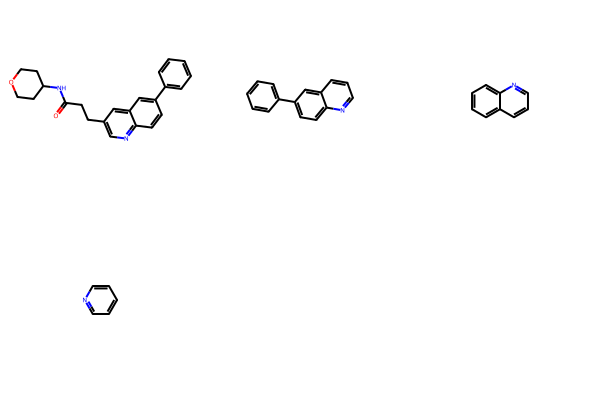

In [14]:
Draw.MolsToGridImage(mols)

In [15]:
re_dict = [rearrange(tup,smi) for smi, tup in tesdt ]


In [16]:
network_df = pd.DataFrame.from_dict(re_dict)
df


,Smiles,data
0,O=C(CCc1cnc2ccc(-c3ccccc3)cc2c1)NC1CCOCC1,"{'type': 'scaffold', 'hierarchy': 4}"
1,c1ccc(-c2ccc3ncccc3c2)cc1,"{'type': 'scaffold', 'hierarchy': 3}"
2,c1ccccc1,"{'type': 'scaffold', 'hierarchy': 1}"
3,c1ccc2ncccc2c1,"{'type': 'scaffold', 'hierarchy': 2}"
4,O=C(CCc1cnc2ccccc2c1)NC1CCOCC1,"{'type': 'scaffold', 'hierarchy': 3}"
...,...,...
1954,c1nnn[nH]1,"{'type': 'scaffold', 'hierarchy': 1}"
1955,c1ccc2c(c1)CCN=C2NCc1nnn[nH]1,"{'type': 'scaffold', 'hierarchy': 3}"
1956,O=C(CCCn1cnc2ccccc21)NCC[NH+]1CCOCC1,"{'type': 'scaffold', 'hierarchy': 3}"
1957,O=C(CCn1cnc2ccccc21)NCC1CCOCC1,"{'type': 'scaffold', 'hierarchy': 3}"


/usr/local/lib/python3.9/site-packages/rdkit/Chem/Draw/IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


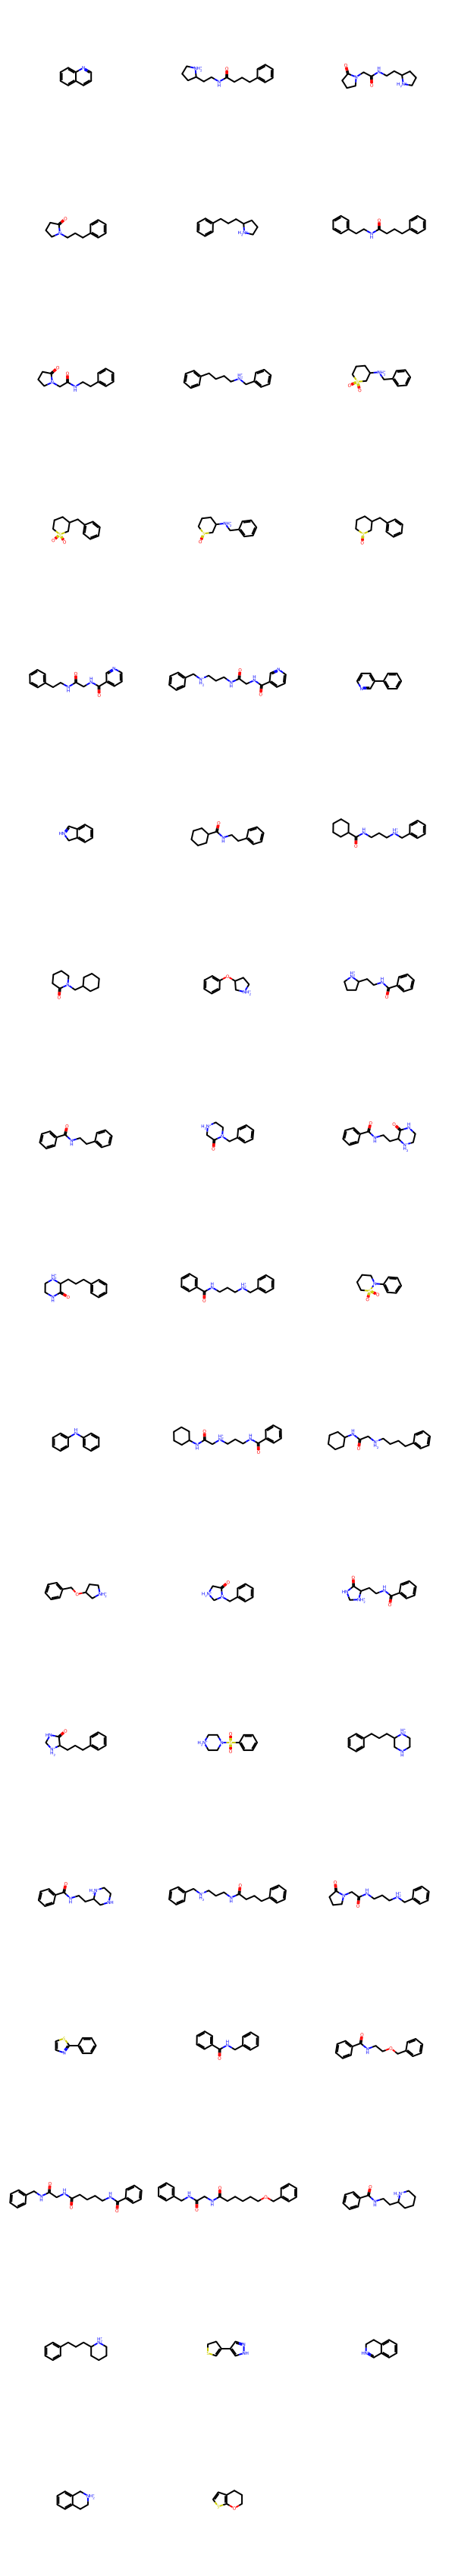

In [17]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in network_df[network_df.hierarchy == 2].smiles])

In [18]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(network_df, smilesCol='smiles')


,smiles,type,hierarchy,ROMol
0,O=C(CCc1cnc2ccc(-c3ccccc3)cc2c1)NC1CCOCC1,scaffold,4,
1,c1ccc(-c2ccc3ncccc3c2)cc1,scaffold,3,
2,c1ccccc1,scaffold,1,
3,c1ccc2ncccc2c1,scaffold,2,
4,O=C(CCc1cnc2ccccc2c1)NC1CCOCC1,scaffold,3,
...,...,...,...,...
1954,c1nnn[nH]1,scaffold,1,
1955,c1ccc2c(c1)CCN=C2NCc1nnn[nH]1,scaffold,3,
1956,O=C(CCCn1cnc2ccccc21)NCC[NH+]1CCOCC1,scaffold,3,
1957,O=C(CCn1cnc2ccccc21)NCC1CCOCC1,scaffold,3,

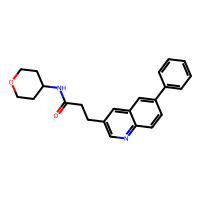
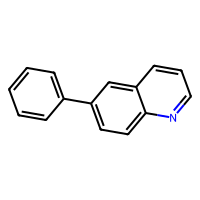
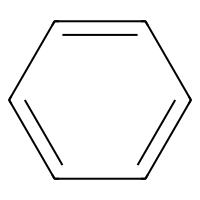
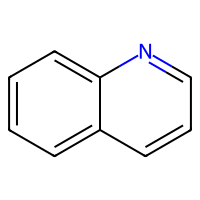
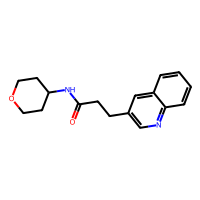
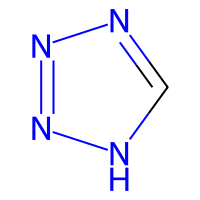
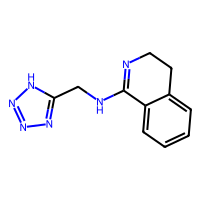
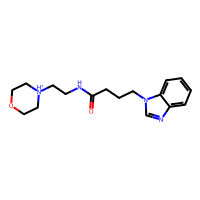
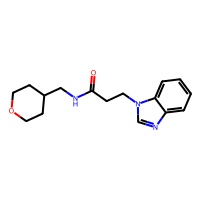
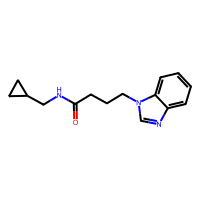

In [19]:
network_df

In [20]:
df = pd.read_csv('deepchem-bace.csv')
tree = sg.ScaffoldTree.from_dataframe(
    df, smiles_column='mol', name_column='CID',
    data_columns=['pIC50'], progress=True,
)

ScaffoldTree:   0%|                                                                                       | 0/…

PubChem ID: BACE_5


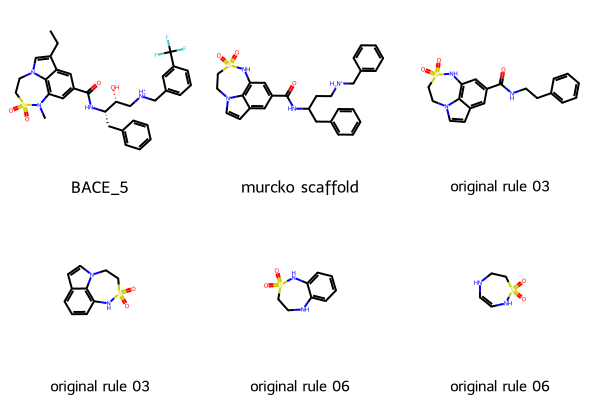

In [90]:
import random
random_pubchem_id = random.choice(list(tree.get_molecule_nodes()))
random_pubchem_id = 'BACE_5'
print('PubChem ID:', random_pubchem_id)
predecessors = nx.bfs_tree(tree, random_pubchem_id, reverse=True)

rules = [random_pubchem_id]
for edge in predecessors.edges():
    # we need to get the edge attr from the original tree
    data = tree.edges[edge[::-1]]
    if data['type'] == 0:  # molecule -> scaffold
        rules.append('murcko scaffold')
    else:  # scaffold -> scaffold
        rules.append(data['rule'])

# # Draw molecules
predecessors_list = list(predecessors)
predecessors_list[0] = tree.nodes[predecessors_list[0]]['smiles'] # [0] is pubchem ID
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in predecessors_list], legends=rules)

In [171]:
# looping over each element e.g ID/Name 
BACE_id = list(tree.get_molecule_nodes())
from collections import defaultdict
import numpy as np
rows = []
for ids in BACE_id:
    # per mole
    predecessors = nx.bfs_tree(tree, ids, reverse=True)
    row = defaultdict(list)
    row['ID'] = ids
    for edge in predecessors.edges():
    # we need to get the edge attr from the original tree
        data = tree.edges[edge[::-1]]
        if data['type'] == 0:  # molecule -> scaffold
            row['murcko scaffold'] = edge[-1]
        else:  # scaffold -> scaffold
            row[data['rule']].append(edge[-1])
    row['original'] = tree.nodes[list(predecessors)[0]]['smiles']
    rows.append(row)
print(rows)
df = pd.DataFrame(data=rows)


query = 'c1ccc(-c2ccc3ncccc3c2)cc1'
# query = df['original rule 03'].tolist()
# for i in query:
#     for idx in i:
#         if i is float:
#             continue
#         if idx is not np.nan or None:
#             df['original rule 03'].map(lambda x: idx in x if x is not np.nan else False)
# flat_list = [item for sublist in query for item in sublist]
# query
# df['exist'] = df['original rule 03'].map(lambda x: query in x if x is not np.nan else False)
# # df['exist'] = df['original rule 03'].map(lambda x: query in x if x is not np.nan else False)
# #     #print(smi)
# print(df['exist'].sum())
# df[:10]

[defaultdict(<class 'list'>, {'ID': 'BACE_1', 'murcko scaffold': 'O=C(CCc1cnc2ccc(-c3ccccc3)cc2c1)NC1CCOCC1', 'original rule 03': ['c1ccc(-c2ccc3ncccc3c2)cc1', 'c1ccc2ncccc2c1'], 'original rule 08': ['c1ccncc1'], 'original': 'Cc1ccccc1-c1ccc2nc(N)c(C[C@@H](C)C(=O)N[C@@H]3CCOC(C)(C)C3)cc2c1'}), defaultdict(<class 'list'>, {'ID': 'BACE_2', 'murcko scaffold': 'O=C(NC(Cc1ccccc1)CC1CCC[NH2+]1)C(CCc1ccccc1)N1CCCC1=O', 'original rule 03': ['O=C(CN1CCCC1=O)NC(Cc1ccccc1)CC1CCC[NH2+]1', 'c1ccc(CCCC2CCC[NH2+]2)cc1'], 'original rule 08': ['C1CC[NH2+]C1'], 'original': 'CCCO[C@H]1C[NH2+][C@@H]([C@@H](O)[C@H](Cc2cc(F)cc(F)c2)NC(=O)[C@H](CCc2ccccc2)N2CC[C@@](CC(C)C)(NC(C)=O)C2=O)C1'}), defaultdict(<class 'list'>, {'ID': 'BACE_3', 'murcko scaffold': 'O=C(NC(CC[NH2+]Cc1ccccc1)Cc1ccccc1)c1cc2c3c(ccn3CCS(=O)(=O)N2)c1', 'original rule 03': ['O=C(NCCc1ccccc1)c1cc2c3c(ccn3CCS(=O)(=O)N2)c1', 'O=S1(=O)CCn2ccc3cccc(c32)N1'], 'original rule 06': ['O=S1(=O)CCNc2ccccc2N1', 'O=S1(=O)CCNC=CN1'], 'original': 'CCc1cn2

In [134]:
query_collection= [x for x in df['original rule 03'].tolist() if str(x) != 'nan']
queries = [item for sublist in query_collection for item in sublist] # get all smiles of rule 03 as flat list
queries_unique = list(set(queries)) # lis tof unique smiles
print(f'Exists {len(queries)} and {len(queries_unique)} uninque smiles')
type(queries_unique)

Exists 1668 and 477 uninque smiles


list

In [213]:
found_smiles = {}
for smi in queries_unique[:4]:
    found = defaultdict(list)
    count_smiles = queries.count(smi)
    found[smi] = count_smiles
    found_smiles.update(found)

#d = pd.DataFrame(data=found_smiles,index=['i',]).T
print(found_smiles)

{'c1cc(C2CC2)cc(N2CC3CCC2C3)c1': 1, 'O=S1(=O)CCCC(Cc2cccc(OC3COC3)c2)C1': 1, 'c1ccc2occc2c1': 1, 'C1=[NH+]CC2=NCCN12': 2}


In [195]:
found_smiles = {}

for smi in queries_unique[:4]:
    found = defaultdict(list)
    count_smiles = queries.count(smi)
    found['smiles'] = smi
    found['count'] = count_smiles
    found_smiles.update(found)

#d = pd.DataFrame(data=found_smiles,index=['i',]).T
found_smiles

{'smiles': 'C1=[NH+]CC2=NCCN12', 'count': 2}

In [ ]:
found_smiles = []
for smi in queries_unique[:4]:
    #found = defaultdict(list)
    count_smiles = queries.count(smi)
    #found[smi] = count_smiles
    item=smi,count_smiles
    found_smiles.append(item)

d = pd.DataFrame(data=found_smiles)
d

In [ ]:
# # # Draw molecules
predecessors_list = list(predecessors)
predecessors_list[0] = tree.nodes[predecessors_list[0]]['smiles'] # [0] is pubchem ID, get smiles for original
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in predecessors_list], legends=rules)

In [46]:
df.columns

Index(['ID', 'murcko scaffold', 'original rule 03', 'original rule 08',
       'original', 'original rule 06', 'original rule 13', 'original rule 05',
       'original rule 04', 'last remaining', 'original rule 09b',
       'original rule 10', 'original rule 02', 'original rule 11',
       'original rule 09a', 'original rule 12'],
      dtype='object')

In [ ]:
predecessors_list

In [216]:
from rdkit.Chem import Descriptors

In [221]:
Chem.MolFromSmiles('c1ccccc1').GetNumAtoms()

6

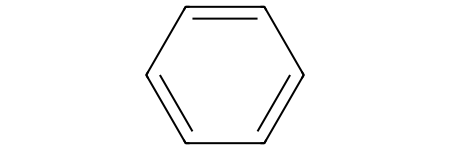

In [223]:
Chem.MolFromSmiles('c1ccccc1')